## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

##  Loading Dataset

In [5]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [6]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
df.shape

(767, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Adding Columns 
Attribute Information:
1. Number of times pregnant 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 3. Diastolic blood pressure (mm Hg) 4. Triceps skin fold thickness (mm) 5. 2-Hour serum insulin (mu U/ml) 6. Body mass index (weight in kg/(height in m)^2) 7. Diabetes pedigree function 8. Age (years) 9. Class variable (0 or 1)

Data description resource: https://data.world/uci/pima-indians-diabetes

In [9]:
df.columns = ['preg','glu','bp','sk','insul','bmi','dpf','age','out']

In [10]:
df.tail()

,preg,glu,bp,sk,insul,bmi,dpf,age,out
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


#### Use eight input features (first eight columns) to build the logistic regression model.

In [11]:
x= df[['preg','glu','bp','sk','insul','bmi','dpf','age']]
y = df[['out']]

## 1.	Split the dataset into two, one for training (70%) and another one for testing (30%). 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.3,shuffle = True,)

## 2.	Normalize input features so that the mean value of each feature is 0 and the standard deviation is 1.

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(x_train)
X_test=sc_X.transform(x_test)

## 3. Learn the logistic regression model using the training data 

In [14]:
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

## 4.	Evaluate the performance of the model on the testing data

In [15]:
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=100 * accuracy_score(y_test, lr_pred)

In [16]:
print("Logistic Regression: ",lr_ac)

Logistic Regression:  75.75757575757575


Text(0.5, 1.0, 'Model Accuracy')

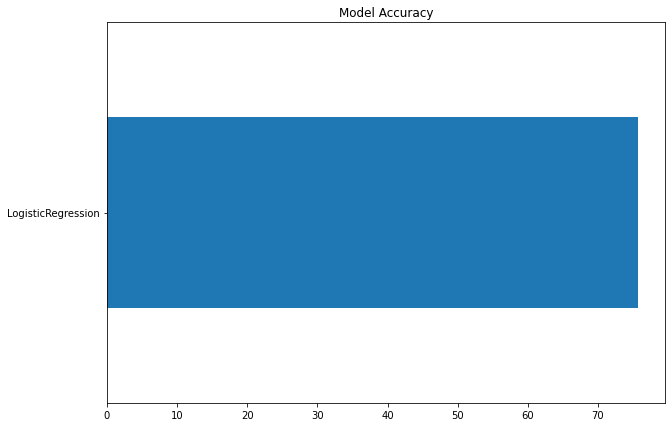

In [17]:
model_accuracy = pd.Series(data=[lr_ac], 
                index=['LogisticRegression'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1, annot = True)
plt.title("LogisticRegression")
sns.heatmap(lr_cm,annot=True,fmt="d",cbar=False)
plt.show()

AttributeError: 'AxesSubplot' object has no property 'annot'

<Figure size 1440x720 with 0 Axes>